# Quickstart Tutorial

## Installation

Imagine your business currently operates in the US, but is launching its product in Europe. As a result it anticipates a sharp uptake in sales (which it has an estimate of). As your forecasting team, they come to you and ask you to account for this.

Let's look at how we might do this using `judgyprophet` with some example data, where we know what happened. First let's plot this:

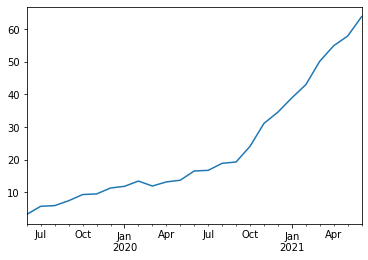

In [12]:
from judgyprophet.tutorials.resources import get_trend_event

example_data = get_trend_event()
p = example_data.plot.line()

We can see that product sales increased sharply from about September 2020. Suppose it was a launch in a new market, and that the business had an initial estimate of the impact in May 2020. The business expected the slope increase to be 6.

Let's use `judgyprophet` to forecast this series from May 2020. We do this by encoding the initial business estimate as a _trend event_.

In [13]:
from judgyprophet import JudgyProphet
import pandas as pd
import seaborn as sns

# Create the expected trend events by consulting with the business
trend_events = [
    {'name': "New market entry", 'index': '2020-09-01', 'm0': 6}
]


# Cutoff the data to May 2020
data_may2020 = example_data.loc[:"2020-05-01"]

# Make the forecast with the business estimated level event
# We have no level events, so just provide the empty list.
jp = JudgyProphet()
# Because the event is beyond the actuals, judgyprophet throws a warning.
#    This is just because the Bayesian model at the event has no actuals to learn from.
#    The event is still used in predictions.
jp.fit(
    data=data_may2020,
    level_events=[],
    trend_events=trend_events,
    # Set random seed for reproducibility
    seed=13
)
predictions = jp.predict(horizon=12)

INFO:judgyprophet.judgyprophet:Rescaling onto 0-mean, 1-sd.


Initial log joint probability = -3.07317
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       7      -2.92768   9.35253e-05   0.000181658           1           1        8   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


Because we are in May 2020, the forecasting algorithm has nothing to use for learning; so just uses the business estimate. Let's plot the result:

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -17.0121
Iteration  1. Log joint probability =    10.4753. Improved by 27.4875.
Iteration  2. Log joint probability =    12.7533. Improved by 2.27796.
Iteration  3. Log joint probability =    25.4696. Improved by 12.7163.
Iteration  4. Log joint probability =     26.707. Improved by 1.2374.
Iteration  5. Log joint probability =    26.7075. Improved by 0.000514342.
Iteration  6. Log joint probability =    26.7104. Improved by 0.00296558.
Iteration  7. Log joint probability =    26.7122. Improved by 0.00171322.
Iteration  8. Log joint probability =    26.7157. Improved by 0.00351772.
Iteration  9. Log joint probability =    26.7159. Improved by 0.000208268.
Iteration 10. Log joint probability =    26.7159. Improved by 6.64977e-05.
Iteration 11. Log joint probability =     26.716. Improved by 6.89899e-05.
Iteration 12. Log joint probability =     26.716. Improved by 3.06578e-05.
Iteration 13. Log joint probability =     26.716. Improved by 8.91492e-07.
Ite

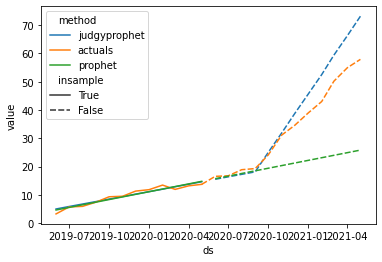

In [14]:
from judgyprophet.tutorials.resources import plot_forecast

plot_forecast(
    actuals=example_data,
    predictions=predictions,
    cutoff="2020-05-01",
    events=trend_events
)

We can see `judgyprophet` is accounting for the increased trend, but the business slightly overestimated the increase in sales due to the product launch.

Let's fast forward to January 2021, the business want to reforecast based on their estimate, and what they've seen so far for the product launch. This is where `judgyprophet` comes into its own. 

Once actuals are observed after the event has taken place, `judgyprophet` updates its estimate of what the event impact is. Let's look at this in action:

In [15]:
# Cutoff the data to January 2021
data_jan2021 = example_data.loc[:"2021-01-01"]

# Reforecast using the new actuals, not we are at Jan 2021
jp = JudgyProphet()
jp.fit(
    data=data_jan2021,
    level_events=[],
    trend_events=trend_events,
    # Set random seed for reproducibility
    seed=13
)
predictions = jp.predict(horizon=12)

INFO:judgyprophet.judgyprophet:Rescaling onto 0-mean, 1-sd.
INFO:judgyprophet.judgyprophet:Adding trend event New market entry to model. Event index: 2020-09-01, training data start index: 2019-06-01 00:00:00, training data end index: 2021-01-01 00:00:00. Initial gradient: 6. Damping: None.


Initial log joint probability = -96.2602
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       7      -1.64341   2.40778e-05   0.000287473           1           1       10   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


Now let's plot the results:

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -24.5881
Iteration  1. Log joint probability =   -1.06803. Improved by 23.5201.
Iteration  2. Log joint probability =    11.6215. Improved by 12.6895.
Iteration  3. Log joint probability =    36.5271. Improved by 24.9056.
Iteration  4. Log joint probability =    37.3776. Improved by 0.850488.
Iteration  5. Log joint probability =    37.6489. Improved by 0.271259.
Iteration  6. Log joint probability =    37.6547. Improved by 0.00580657.
Iteration  7. Log joint probability =    37.7831. Improved by 0.128419.
Iteration  8. Log joint probability =    37.7884. Improved by 0.00527858.
Iteration  9. Log joint probability =     37.789. Improved by 0.000612124.
Iteration 10. Log joint probability =    37.7891. Improved by 9.93823e-05.
Iteration 11. Log joint probability =    37.7902. Improved by 0.00112416.
Iteration 12. Log joint probability =    37.7902. Improved by 3.17397e-06.
Iteration 13. Log joint probability =    37.7902. Improved by 1.59404e-05.
Iterati

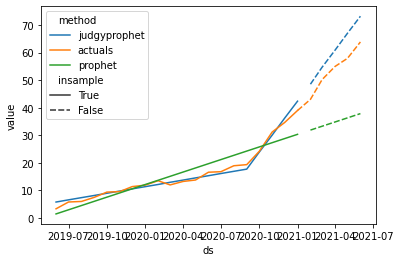

In [16]:
plot_forecast(actuals=example_data, predictions=predictions, cutoff="2021-01-01", events=trend_events)

In this case, once `judgyprophet` observes the data post-event, the Bayesian updating starts to realise the business estimate is a bit large, so it reduces it.

This was a simple example to demonstrate `judgyprophet`. You can add many trend events into a single forecasting horizon, add damping. You can also add level events – changes in the forecasting level; and seasonality see our other tutorials for details about this.